In [1]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
# from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
import numpy as np

In [2]:
def generate_w_state(n_qubits, shots=5000):
    # Simulator
    simulator = QasmSimulator()

    # System Specification
    qr = QuantumRegister(n_qubits)
    cr = ClassicalRegister(n_qubits)
    circ = QuantumCircuit(qr, cr)

    for i in range(1, n_qubits):
        circ.cx(qr[0], qr[i])
        circ.x(qr[i])
        circ.ry(np.arcsin(1 / ((n_qubits + 1 - i) ** (1/2))), qr[0])
        circ.cx(qr[i], qr[0])
        circ.ry(-np.arcsin(1 / ((n_qubits + 1 - i) ** (1/2))), qr[0])
        circ.x(qr[i])
        circ.cx(qr[0], qr[i])

        circ.x(qr[0]) # This is not covered in the paper
        circ.x(qr[i]) # This is not covered in the paper
        if i > 1:
            circ.swap(qr[0], qr[i]) # This is not covered in the paper

    circ.x(qr[0]) # flip back the first qubit
    circ.barrier()
    circ.measure(qr, cr)
    # circ.draw(output='mpl')

    job = execute(circ, simulator, basis_gates = ['u1', 'u2', 'u3', 'cx', 'cu1', 'cu3'], shots=shots)
    result_ideal = job.result()
    # plot_histogram(result_ideal.get_counts())
    return result_ideal.get_counts()

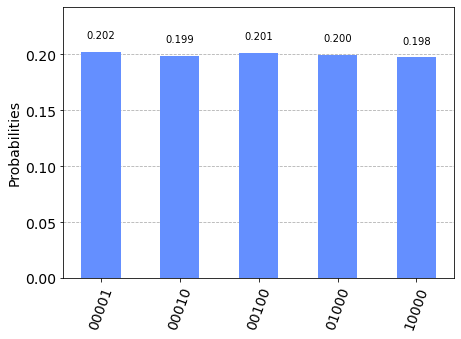

In [3]:
result_count = generate_w_state(5, shots=50000)
plot_histogram(result_count)
# print(result)